In [2]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import os          
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc,f1_score
import sklearn.linear_model as lm



print("finished this block")

finished this block


In [3]:
import sys, os
sys.path.insert(0, '..')
from lib import models, graph, coarsening, utils
import tensorflow as tf
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline
flags = tf.app.flags
FLAGS = flags.FLAGS
print("finished this block")

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


finished this block


In [4]:
os.getcwd()
os.chdir('../braindata')
dd =pd.read_csv("data_3_all.csv",header=0)
import csv
with open('data_3_all.csv', 'r') as f:
    d_reader = csv.DictReader(f)
    headers = d_reader.fieldnames
print("finished this block")

finished this block


In [5]:
data=np.array(dd)
idx_IN_columns = np.append(np.array([3,4]),np.array(range(11,data.shape[1])))
X=data[:,idx_IN_columns]
X = stats.zscore(X)
y=data[:,6]

ind_num=np.isnan(y)
# print(ind_num.shape)
y_no_nan = y[~ind_num]
X_no_nan = X[~ind_num,:]

y=y_no_nan
X=X_no_nan
np.isnan(X).any()
X[np.isnan(X)] = np.median(X[~np.isnan(X)])
print("finished this block")


finished this block


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [6]:
feature_num_all=[]
GCN_all_feature=[]
GCN_f1s_feature=[]
base_labels= []

###########################
#From Yun's code, selecting the import features
clf = ExtraTreesClassifier(n_estimators=50,random_state=0)
clf = clf.fit(X, y)
importances = clf.feature_importances_
importances
indices = np.argsort(importances)[::-1]
############################
n_features = [100,1000]
n_features.sort()


print("Finished this block")

Finished this block


In [7]:
C = max(y) + 1  # number of classes    

common = {}
common['dir_name']       = 'Chenxiao_Testing'
common['num_epochs']     = 15
common['batch_size']     = 10
common['eval_frequency'] = common['num_epochs']
common['brelu']          = 'b1relu'
common['pool']           = 'mpool1'
common['filter']         = 'chebyshev5'

# Architecture.
common['F']              = [64, 64, 32]  # Number of graph convolutional filters.
common['K']              = [20, 20, 20]  # Polynomial orders.
common['p']              = [4, 4, 2]    # Pooling sizes.
common['M']              = [512, C]  # Output dimensionality of fully connected layers.

# Optimization.
common['regularization'] = 5e-4
common['dropout']        = 0.9
common['learning_rate']  = 1e-3
common['decay_rate']     = 0.95
common['momentum']       = 0.9
#params['decay_steps']    = n_train / params['batch_size']

model_perf = utils.model_perf()    

sep = '*' * 100
print("finished this block")

finished this block



 RUN: 0 **************************************************************************************************** 


 Fold: 0 **************************************************************************************************** 

d = |V| = 1000, k|V| < |E| = 16716
Layer 0: M_0 = |V| = 1088 nodes (88 added),|E| = 8358 edges
Layer 1: M_1 = |V| = 544 nodes (27 added),|E| = 5573 edges
Layer 2: M_2 = |V| = 272 nodes (11 added),|E| = 3629 edges
Layer 3: M_3 = |V| = 136 nodes (5 added),|E| = 2017 edges
Layer 4: M_4 = |V| = 68 nodes (2 added),|E| = 991 edges
Layer 5: M_5 = |V| = 34 nodes (1 added),|E| = 378 edges
Layer 6: M_6 = |V| = 17 nodes (0 added),|E| = 121 edges
begin working!!!!!!!!
validation accuracy: peak = 81.82, mean = 79.55
INFO:tensorflow:Restoring parameters from /Users/ChenxiaoXu/repos/project1/idp_jio/lib/../checkpoints/Chenxiao_TestingCGCNN_Run0_Skf0/model-114
train accuracy: 100.00 (76 / 76), f1 : 100.00, loss: 1.24e+00
time: 7s (wall 3s)
INFO:tensorflow:Restoring parameters from

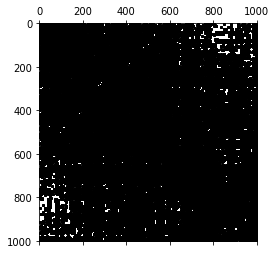

In [8]:
###########################
#From Yun's code, selecting the import features
clf = ExtraTreesClassifier(n_estimators=50,random_state=0)
clf = clf.fit(X, y)
importances = clf.feature_importances_
importances
indices = np.argsort(importances)[::-1]
############################


number_of_features=1000
index=indices[0:number_of_features]
features=X[:,index]
feature_num=features.shape[1]

GCN_all_accs_one_fetur  = []
GCN_all_scores_one_fetur = []
GCN_all_f1s_one_fetur = []
base_labels=[]

###############################################################################
###############################################################################
#This part is from the NIPS code, generating training, validation and traing set

for runs in range(1):        
    print("\n RUN: {} {} \n".format(runs, sep))

    GCN_accuracies = []
    GCN_scores = []
    strat_labels = []
    GCN_f1s=[]
    
    
    bin_ixs = []
    train_ixs = []

    t=time.process_time()
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=int(t))
                          
    for train_index, test_index in skf.split(features, y):
        bin_ixs.append(test_index)    
    
    
        
    for i in range(skf.get_n_splits(features, y)): 
        bins=list(range(skf.get_n_splits(features,y)))
        print("\n Fold: {} {} \n".format(i, sep))
            
        train_data = np.empty([0,features.shape[1]])
        train_labels = [] 
        val_ix = i
        if val_ix == max(bins):
            test_ix = 0
            bins.remove(val_ix)
            bins.remove(test_ix)

        else:
            test_ix = val_ix + 1
            bins.remove(test_ix)
            bins.remove(val_ix)

        val_data, val_labels = features[bin_ixs[val_ix]], y[bin_ixs[val_ix]]
        test_data, test_labels = features[bin_ixs[test_ix]], y[bin_ixs[test_ix]]
        
        for b in bins:
            train_data = np.concatenate((train_data, features[bin_ixs[b]]))
            train_labels = np.concatenate((train_labels, y[bin_ixs[b]]))

###################################################
#Chenxiao: generating permuational matrix
        dist, idx = graph.distance_scipy_spatial(train_data.transpose(), k=10, metric='euclidean')
        A = graph.adjacency(dist, idx).astype(np.float32)

        assert A.shape == (features.shape[1], features.shape[1])
        print('d = |V| = {}, k|V| < |E| = {}'.format(features.shape[1], A.nnz))
        plt.spy(A, markersize=2, color='black')     
        
        graphs, perm = coarsening.coarsen(A, levels=6, self_connections=False)
        
        train_data = coarsening.perm_data(train_data, perm)
        val_data = coarsening.perm_data(val_data, perm)
        test_data = coarsening.perm_data(test_data, perm)

        L = [graph.laplacian(A, normalized=True) for A in graphs]
 #       graph.plot_spectrum(L)    
 ###################################################        
    
        name = 'CGCNN'
        params = common.copy()
        params['dir_name'] = params['dir_name'] + name + '_Run' + str(runs) + '_Skf' + str(i)             
        params['decay_steps'] = len(train_labels) / common['batch_size']
        
        print('begin working!!!!!!!!')
        model_perf.test(models.cgcnn(L, **params), name, params, 
                        train_data, train_labels, val_data, val_labels, test_data, test_labels, val_ix)
        
        scores, f1, y_labels, test_accuracy = model_perf.show()   
            
        strat_labels=np.append(strat_labels, test_labels)
            
####################################################   
#Chenxiao: add Yun's code for logistric regression and SVM, for comparision with GCN case by case
        logistic = linear_model.LogisticRegression(C=1e5)
        rbf = svm.SVC(C=10,kernel='linear',gamma=0.01)
#######################
#logistic regression:

        log=logistic.fit(train_data, train_labels)
    
        #log_prob_val=log.decision_function(val_data)
        #log_prob_test=log.decision_funtion(test_data)
        
        log_acc_val=log.score(val_data, val_labels)
        log_acc_test=log.score(test_data, test_labels)    
        
        ##f1 calculation
        y_pred_val=logistic.predict(val_data)
        y_pred_test=logistic.predict(test_data)
        
        log_f1_val=f1_score(val_labels, y_pred_val)
        log_f1_test=f1_score(test_labels, y_pred_test)
        
        
        print('Logistic Regression Accuracy for Validation: %f' % log_acc_val)
        print('Logistic Regression Accuracy for Test: %f' % log_acc_test)
        print('Logistic Regression F1 for Validation: %f' % log_f1_val)
        print('Logistic Regression F1 for Test: %f' % log_f1_test)
        
        
#SVM:
        rbf=rbf.fit(train_data, train_labels)
    
        #svm_prob_val=rbf.decision_function(val_data)
        #svm_prob_test=rbf.decision_funtion(test_data)
        
        svm_acc_val=rbf.score(val_data, val_labels)
        svm_acc_test=rbf.score(test_data, test_labels)    
        
        #f1 calculation
        y_pred_val=rbf.predict(val_data)
        y_pred_test=rbf.predict(test_data)
        
        svm_f1_val=f1_score(val_labels, y_pred_val)
        svm_f1_test=f1_score(test_labels, y_pred_test)
               
        print('SVM Accuracy for Validation: %f' % svm_acc_val)
        print('SVM Accuracy for Test: %f' % svm_acc_test)
        print('SVM F1 for Validation: %f' % svm_f1_val)
        print('SVM F1 for Test: %f' % svm_f1_test)        
                
####################################################        
        
        
        ##f1 calculation
        #log_f1=f1_score(test_labels, y_labels)            

        GCN_accuracies = np.append(GCN_accuracies, test_accuracy)
        GCN_scores=np.append(GCN_scores, scores)
        GCN_f1s=np.append(GCN_f1s, f1)
   
    base_labels=np.append(base_labels, strat_labels)        
    GCN_all_scores_one_fetur=np.append(GCN_all_scores_one_fetur, GCN_scores) 
    GCN_all_accs_one_fetur=np.append(GCN_all_accs_one_fetur, np.mean(GCN_accuracies))
    GCN_all_f1s_one_fetur =np.append(GCN_all_f1s_one_fetur, np.mean(GCN_f1s))
    

In [9]:
print("Runs Avg Accuracies: {}".format(np.mean(GCN_all_accs_one_fetur)))
print("Standard Deviation: {}".format(np.std(GCN_all_accs_one_fetur)))
print("Runs Avg F1: {}".format(np.mean(GCN_all_f1s_one_fetur)))
print("Standard Deviation: {}".format(np.std(GCN_all_f1s_one_fetur)))

Runs Avg Accuracies: 88.91919191919192
Standard Deviation: 0.0
Runs Avg F1: 90.94172494172493
Standard Deviation: 0.0
